# Regresión lineal: predecir los gastos médicos de pacientes
---

Para este ejercicio utilizaremos los datos presentados en [este](https://www.kaggle.com/mirichoi0218/insurance) dataset de Kaggle en el cual se presentan datos de seguros médicos. 


## Descarga e instalación de librerías

In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [195]:
sns.set(style = "whitegrid", context = "notebook")

## Descarga de datos


In [196]:
df = pd.read_csv("../data/raw/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analizando los datos
Se observará cómo se distribuyen los datos de la variable a predecir.

(1338, 7)


<AxesSubplot: >

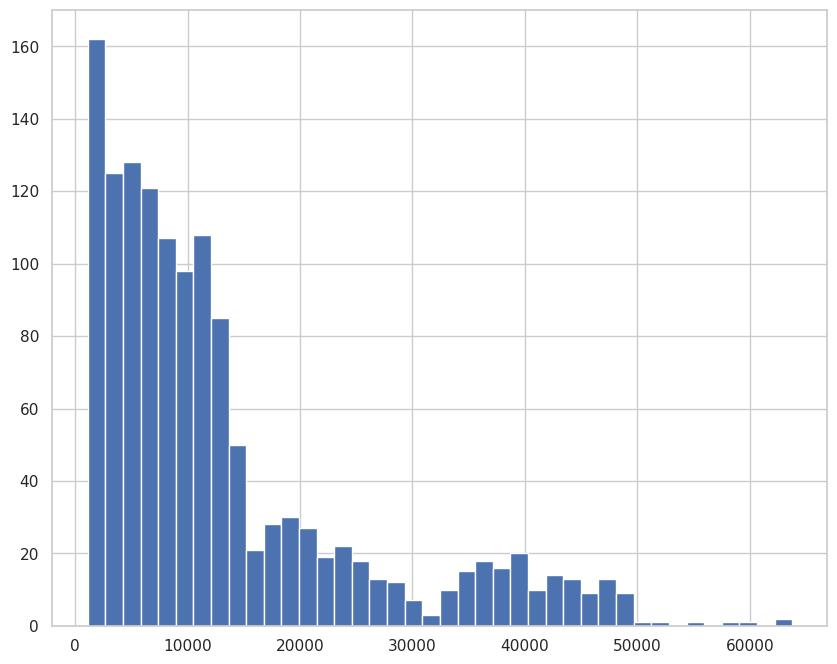

In [197]:
plt.figure(figsize = (10,8))
print(df.shape)
df["charges"].hist(bins = 40)

Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

In [198]:
df[df.charges > 50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [199]:
df = df[df.charges <= 50000]
print(df.shape)

(1331, 7)


En este caso, al ser pocos datos (7 de 1338), eliminaremos estos datos atípicos. A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio. 

Sin embargo es importante aclarar que **NO SE DEBEN ELIMINAR** datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos.

### Procedemos a analizar la distribución de las otras variables númericas.

#### BMI o Indice de Masa Corporal. 

<AxesSubplot: >

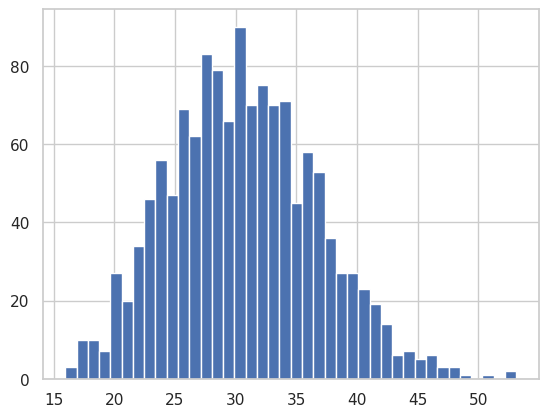

In [200]:
df["bmi"].hist(bins = 40)

In [201]:
df = df[df.bmi <= 50]
df.shape

(1328, 7)

#### Edad

<AxesSubplot: >

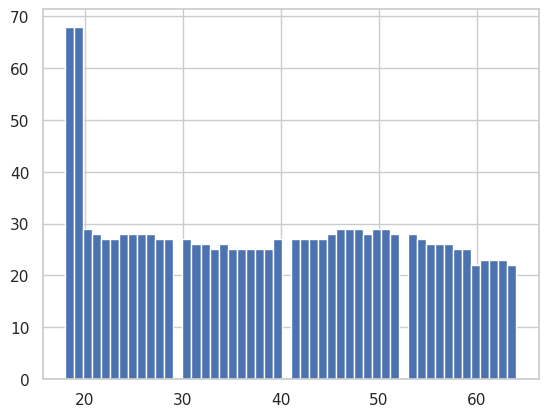

In [202]:
df["age"].hist(bins = 50)

#### Región

<AxesSubplot: >

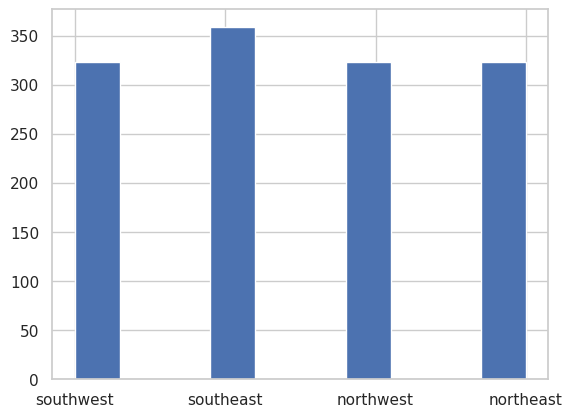

In [203]:
df["region"].hist()

#### Número de hijos. 

<AxesSubplot: >

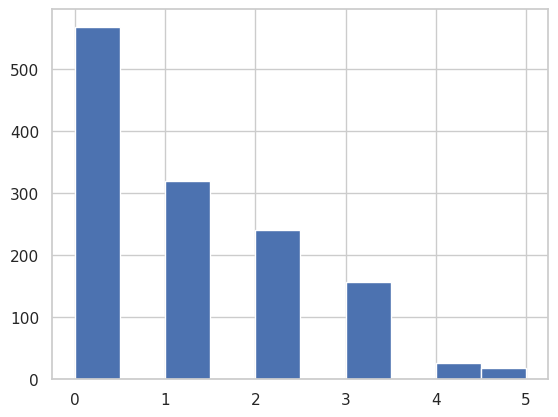

In [204]:
df["children"].hist()

## Análisis de correlaciones
Ahora entendamos nuestros datos numéricos, viendo cómo se distribuyen y correlacionan. 

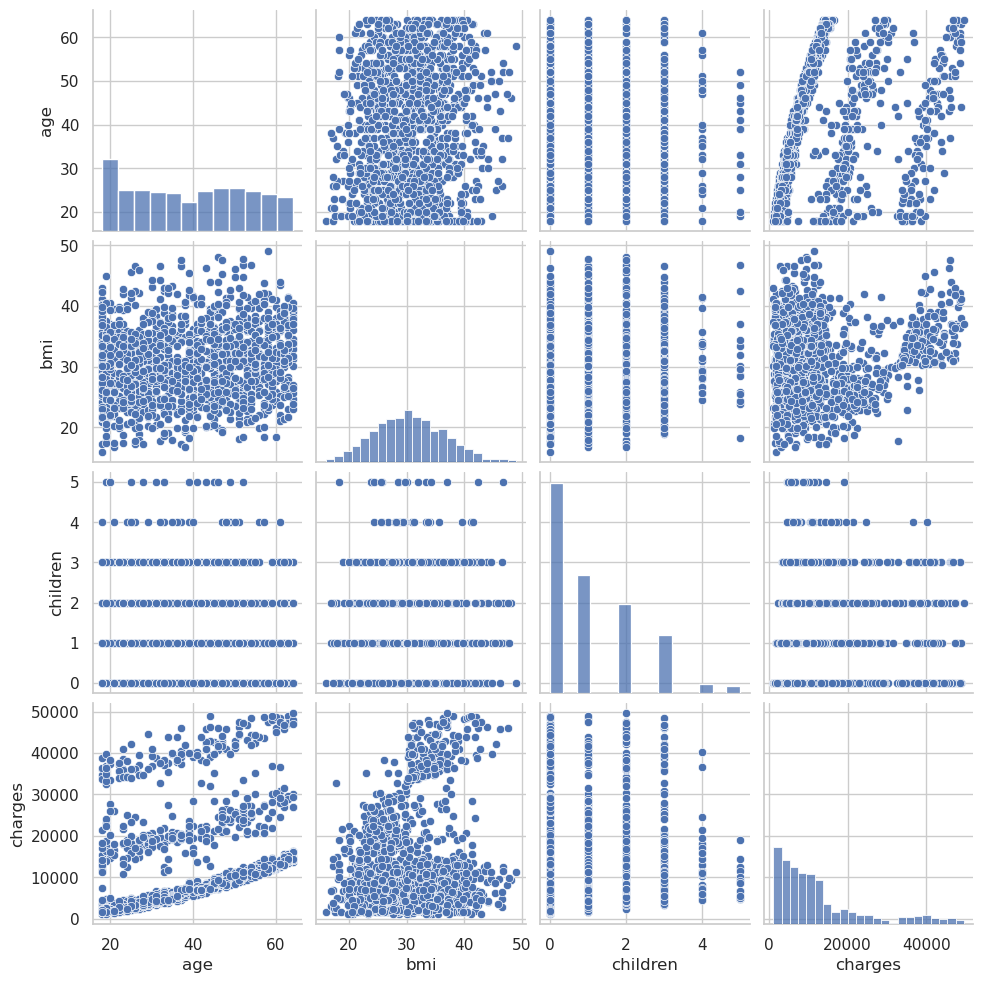

In [205]:
sns.pairplot(df, height = 2.5)
plt.show()

Puntos interesantes a ver:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

### Matriz de correlación. 
Se analiza la correlación entre variables númericas. 

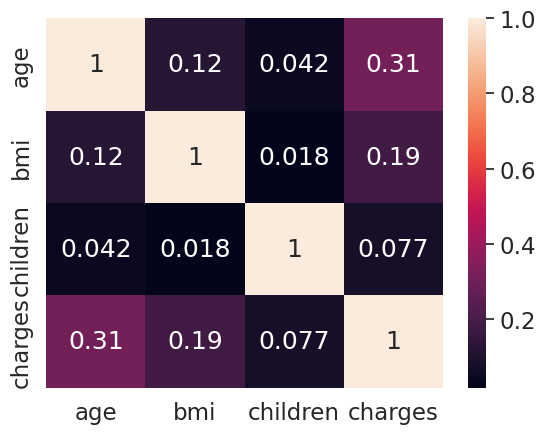

In [208]:
numeric_cols = ['age','bmi', 'children', 'charges']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.set(font_scale = 1.5)
sns.heatmap(cm, annot = True, yticklabels = numeric_cols, xticklabels = numeric_cols)
plt.show()

## Utilizando las variables numéricas y categóricas. 
Se utiliza el método get_dummies de pandas para incluir a las variables categoricas, sexo, fumador y región.


In [236]:
df_dummies = df.copy( deep = True)



In [237]:
df_dummies = pd.get_dummies(df, columns = ["sex", "smoker", "region"], drop_first = True)

In [238]:
df_dummies.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Se realiza un matriz de correlación contemplando las variables numéricas y categóricas.  

<AxesSubplot: >

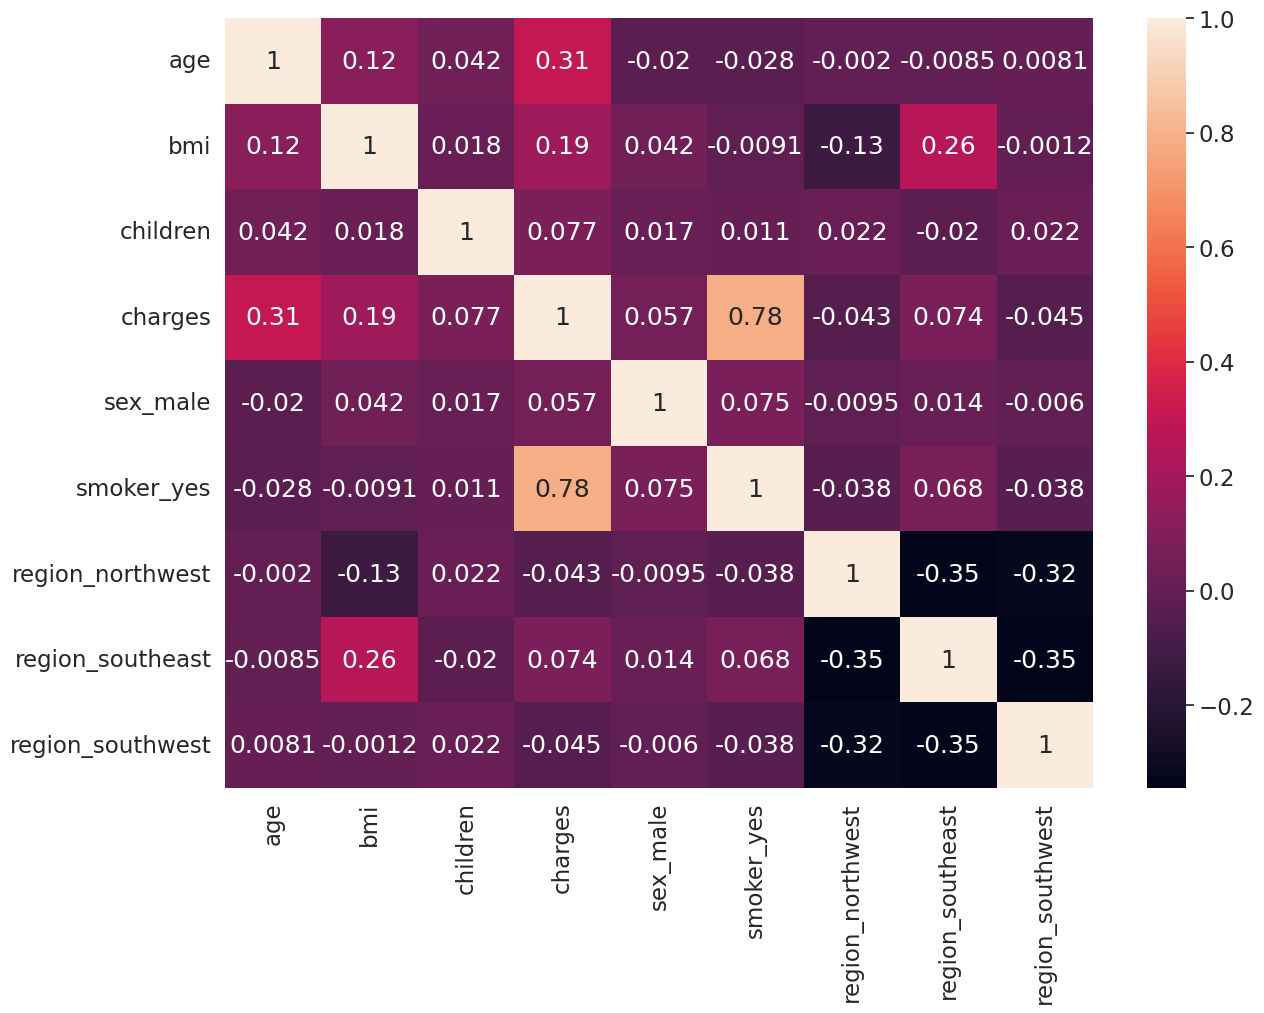

In [249]:
plt.figure(figsize = (14,10))
cm_dummies = np.corrcoef(df_dummies.values.T)
sns.set(font_scale = 1.5)
sns.heatmap(cm_dummies, annot = True, xticklabels = df_dummies.columns, yticklabels = df_dummies.columns)

Punto importante: 

- La variable categórica smoker_yes (fumador) tiene la correlación más alta con respecto a la variable objetivo charges (cargos).

#### Se emplea el método pairplot de Seaborn para generar un gráfico que desglose los datos numéricos en relación con la variable smoker_yes (indicando si el individuo es fumador o no). 

Esto proporciona una visualización efectiva de cómo los diferentes atributos numéricos se distribuyen en función del hábito de fumar.

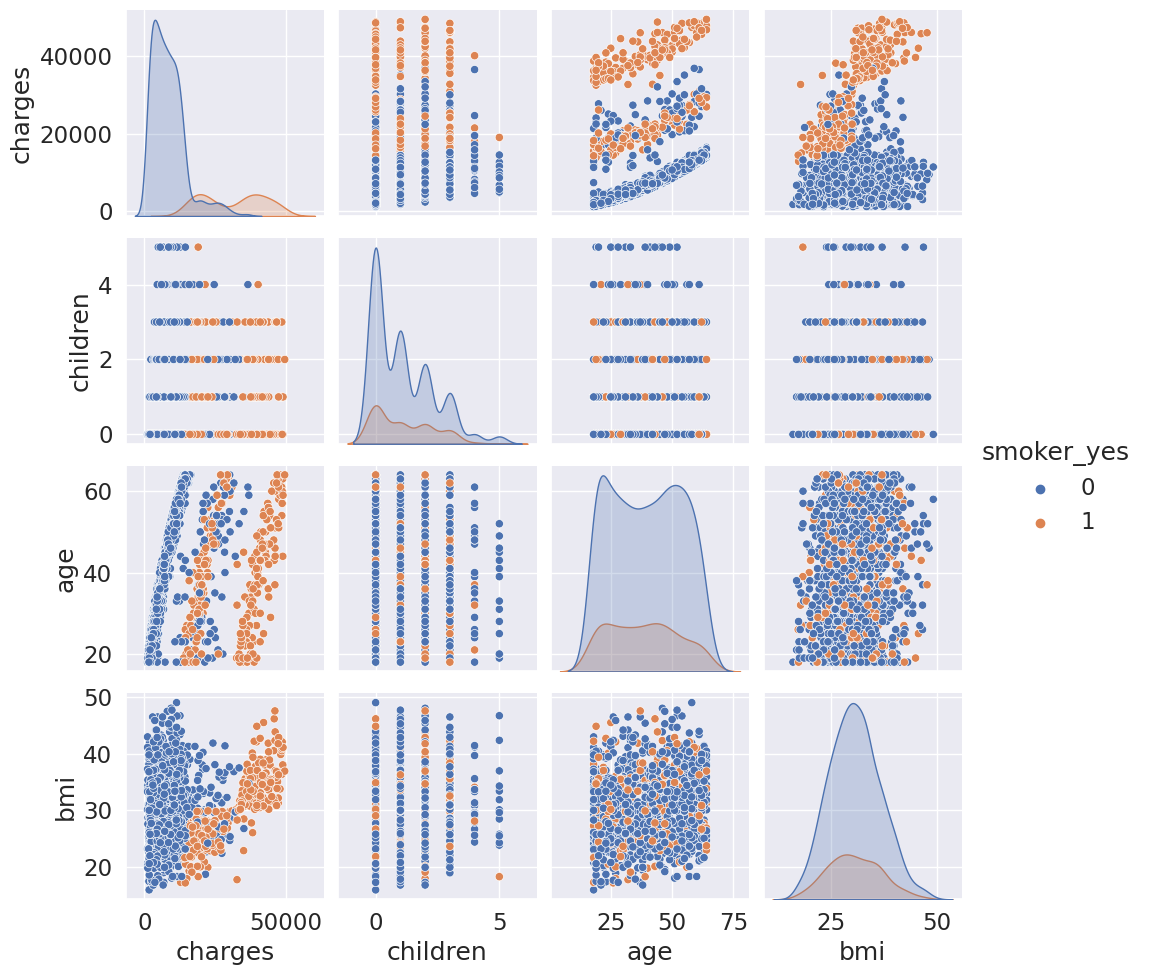

In [213]:
sns.pairplot(data = df_dummies[["charges", "children", "age", "bmi", "smoker_yes"]], hue = "smoker_yes")

## Creando modelos 
Primero se usará un modelo con todas las variables.

In [214]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [254]:
# Seleccionar las columnas de características (X_cols) y la variable objetivo (y_col)
X_cols = list(set(df_dummies.columns) - set(["charges"]))
y_col = ["charges"]

# Crear matrices X e y a partir del DataFrame df_dummies
X = df_dummies[X_cols].values
y = df_dummies[y_col].values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Estandarizar (normalizar) las características y la variable objetivo
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)


In [240]:
y_pred.shape

(332, 1)

## Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

In [217]:
import sklearn.metrics as metrics

In [246]:
# Calcular el error cuadrático medio (MSE) entre las etiquetas reales (y_test) y las predicciones (y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R^2) entre las etiquetas reales (y_test) y las predicciones (y_pred)
r2 = metrics.r2_score(y_test, y_pred)

# Imprimir el valor de R^2 redondeado a 4 decimales
print("r2:", r2.round(4))

# Imprimir el valor del MSE redondeado a 4 decimales
print("mse:", mse.round(4))


r2: 0.7581
mse: 0.2554


El siguiente código muestra un resumen general de los resultados.

***Para importar regressors realizar: pip install setuptools==58. Luego: pip install regressors*** 

In [255]:
from regressors import stats

In [256]:
# Ajustar el valor de model.intercept_ y model.coef_
# model.intercept_: Intercepto del modelo, se convierte en un valor escalar
model.intercept_ = model.intercept_[0]

# model.coef_: Coeficientes del modelo, se convierten en un arreglo unidimensional
model.coef_ = model.coef_.reshape(-1)

In [257]:
print("==================Summary==================")

# Generar un resumen estadístico del modelo
# - 'model': El modelo de regresión entrenado
# - 'X_test': Las características de prueba (variables independientes)
# - 'y_test.reshape(-1)': Las etiquetas reales de prueba (variable dependiente)
# - 'X_cols': El nombre de las columnas de características (variables independientes)
stats.summary(model, X_test, y_test.reshape(-1), X_cols)


==================Summary==================
Residuals:
    Min      1Q  Median     3Q    Max
-1.8363 -0.1068  0.0794 0.2223 0.9321


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.002713    0.026753  -0.1014  0.919294
region_northwest -0.033657    0.030608  -1.0996  0.272302
smoker_yes        0.789935    0.028043  28.1685  0.000000
bmi               0.158579    0.026879   5.8996  0.000000
sex_male          0.007491    0.026944   0.2780  0.781169
children          0.061059    0.026139   2.3359  0.020094
region_southeast -0.035038    0.033047  -1.0602  0.289809
age               0.312709    0.026598  11.7571  0.000000
region_southwest -0.044994    0.030875  -1.4573  0.145987
---
R-squared:  0.75381,    Adjusted R-squared:  0.74771
F-statistic: 123.63 on 8 features


Finalmente tenemos la función que calcula los residuales. Es importante notar que es una simple resta entre los valores reales y los predichos.

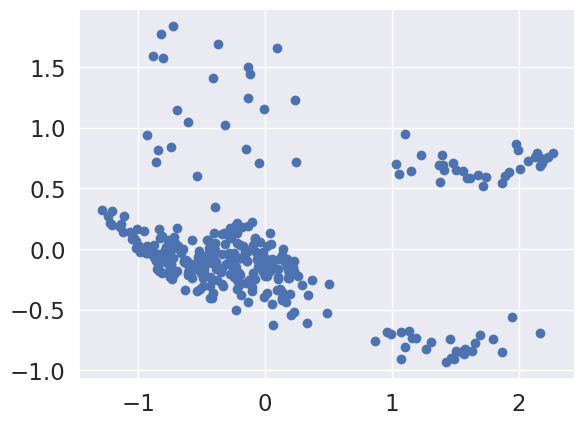

In [258]:
# Calcular los residuos (diferencia entre los valores reales y las predicciones)
residuals = np.subtract(y_test, y_pred)

# Crear un gráfico de dispersión de las predicciones vs. los residuos
# - 'y_pred': Las predicciones del modelo
# - 'residuals': Los residuos calculados
plt.scatter(y_pred, residuals)

# Mostrar el gráfico de dispersión
plt.show()


**Resumen del Primer Modelo:**
- **Variables Usadas:** En el primer modelo, se utilizaron las siguientes variables como características: `region_northwest`, `smoker_yes`, `bmi`, `sex_male`, `children`, `region_southeast`, `age`, y `region_southwest`.

- **R-squared:** El coeficiente de determinación (R-squared) del primer modelo fue de aproximadamente 0.7538, lo que significa que el modelo pudo explicar alrededor del 75.38% de la variabilidad en los datos.

- **Ajuste del Modelo:** El modelo se ajustó utilizando ocho características diferentes y tuvo un F-statistic de 123.63, lo que indica que al menos una de las características fue significativa en la predicción del resultado.

- **Coeficientes Destacados:** Entre los coeficientes destacados, se observó que la variable `smoker_yes` tenía un coeficiente positivo alto, lo que sugiere que el hecho de ser fumador tenía un fuerte impacto positivo en los costos médicos.

## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

In [281]:
# Se crea una copia del DataFrame original 'df_dummies' para trabajar con el segundo modelo.
df_model2 = df_dummies.copy()

# Se crea una nueva variable llamada 'sobrepeso' que toma el valor 1 si el índice de masa corporal (bmi) es mayor o igual a 30, y 0 en caso contrario.
df_model2["sobrepeso"] = (df_model2.bmi >= 30).astype(int)

# Se crea una nueva variable llamada 'sobrepeso*fumador' que es el producto de las variables 'sobrepeso' y 'smoker_yes'.
df_model2["sobrepeso*fumador"] = df_model2.sobrepeso * df_model2.smoker_yes

# Se crea una nueva variable llamada 'age**2' que representa el cuadrado de la variable 'age'.
df_model2["age**2"] = df_model2.age**2

# Se muestra una vista previa de las primeras filas del DataFrame 'df_model2' para observar las nuevas variables.
df_model2.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,sobrepeso,sobrepeso*fumador,age**2
0,19,27.900,0,16884.92400,0,1,0,0,1,0,0,361
1,18,33.770,1,1725.55230,1,0,0,1,0,1,0,324
2,28,33.000,3,4449.46200,1,0,0,1,0,1,0,784
3,33,22.705,0,21984.47061,1,0,1,0,0,0,0,1089
4,32,28.880,0,3866.85520,1,0,1,0,0,0,0,1024


Analizando el segundo modelo

In [284]:
# Se definen las columnas predictoras (variables independientes) y la columna objetivo (variable dependiente).
X_cols = ["age**2", "sobrepeso*fumador", "smoker_yes", "children"]
y_col = ["charges"]

# Se seleccionan las columnas del DataFrame 'df_model2' correspondientes a las variables predictoras ('X_cols') y la columna objetivo ('y_col').
X = df_model2[X_cols].values
y = df_model2[y_col].values

# Se divide el conjunto de datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Se realiza un proceso de estandarización (escalado) de las variables predictoras ('X') y la variable objetivo ('y').
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

# Se crea un modelo de regresión lineal ('model2') y se ajusta a los datos de entrenamiento escalados.
model2 = LinearRegression(fit_intercept = False)
model2.fit(X_train, y_train)

# Se realizan predicciones ('y_pred') utilizando el modelo entrenado en el conjunto de prueba escalado ('X_test').
y_pred = model2.predict(X_test)


In [285]:
y_pred.shape

(332, 1)

In [286]:
# Se calcula el error cuadrático medio (MSE) comparando las predicciones ('y_pred') con los valores reales del conjunto de prueba ('y_test').
mse = metrics.mean_squared_error(y_test, y_pred)

# Se calcula el coeficiente de determinación (R cuadrado, R²) que indica la bondad de ajuste del modelo a los datos de prueba.
r2 = metrics.r2_score(y_test, y_pred)

# Se imprimen los valores calculados de R² y MSE redondeados a 4 decimales.
print("r2:", r2.round(4))
print("mse:", mse.round(4))


r2: 0.8746
mse: 0.1522


In [288]:
# Se ajusta la forma (shape) del coeficiente (coef_) del segundo modelo para que sea un arreglo unidimensional.
model2.coef_ = model2.coef_.reshape(-1)


In [289]:
# Imprime un encabezado para el resumen
print("==================Summary==================")

# Genera un resumen de estadísticas para el modelo2
stats.summary(model2, X_test, y_test.reshape(-1), X_cols)


==================Summary==================
Residuals:
   Min     1Q  Median     3Q    Max
-2.039 0.0588  0.1104 0.1404 0.2682


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.021464   0.0000  1.000000
age**2             0.319926    0.021234  15.0668  0.000000
sobrepeso*fumador  0.498073    0.025743  19.3476  0.000000
smoker_yes         0.449475    0.026827  16.7545  0.000000
children           0.073519    0.021421   3.4321  0.000675
---
R-squared:  0.87461,    Adjusted R-squared:  0.87308
F-statistic: 570.23 on 4 features


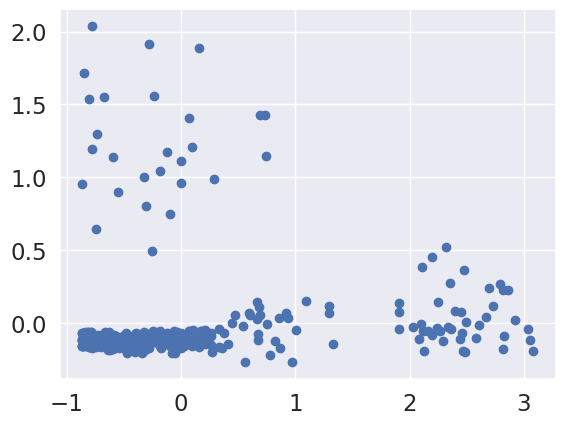

In [291]:
# Calcula los residuos restando las predicciones del modelo2 de los valores reales de prueba
residuals = np.subtract(y_test, y_pred)

# Genera un gráfico de dispersión de las predicciones frente a los residuos
plt.scatter(y_pred, residuals)

# Muestra el gráfico
plt.show()


**Resumen del Segundo Modelo:**
- **Variables Usadas:** En el segundo modelo, se utilizaron las siguientes variables como características: `age**2`, `sobrepeso*fumador`, `smoker_yes`, y `children`.

- **R-squared:** El coeficiente de determinación (R-squared) del segundo modelo fue de aproximadamente 0.8746, lo que indica una mejora significativa en comparación con el primer modelo. El segundo modelo pudo explicar alrededor del 87.46% de la variabilidad en los datos.

- **Ajuste del Modelo:** El segundo modelo se ajustó utilizando solo cuatro características, lo que sugiere una reducción en la dimensionalidad del modelo en comparación con el primer modelo. El F-statistic del segundo modelo fue de 570.23, lo que indica que las características utilizadas eran altamente significativas en la predicción del resultado.

- **Coeficientes Destacados:** En el segundo modelo, las variables `age**2` y `sobrepeso*fumador` tenían coeficientes significativos y positivos, lo que sugiere que estas dos variables tenían un fuerte impacto en los costos médicos. La variable `smoker_yes` también tuvo un coeficiente positivo, aunque menor en comparación con el primer modelo.

**Comparación General:**
- El segundo modelo mostró una mejora sustancial en el R-squared en comparación con el primer modelo, lo que sugiere que el segundo modelo se ajustó mejor a los datos y fue capaz de explicar una mayor parte de la variabilidad en los costos médicos.

- El segundo modelo utilizó menos características en comparación con el primer modelo, lo que podría indicar una simplificación del modelo sin sacrificar la calidad de las predicciones.

- La inclusión de variables transformadas como `age**2` y `sobrepeso*fumador` en el segundo modelo parece haber mejorado significativamente su capacidad para predecir los costos médicos.

En resumen, el segundo modelo demostró ser una mejora sobre el primer modelo en términos de capacidad de predicción y simplificación de características, y las variables `age**2` y `sobrepeso*fumador` jugaron un papel importante en esta mejora.